# Image classification, MNIST digits

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

from sklearn.datasets import fetch_openml

## Importing data and viewing

In [ ]:
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

In [3]:
x, y = mnist['data'].values, mnist['target'].values
y = y.astype(np.float_)
print(x) # handwritten number
print(y) # referent number

2.0


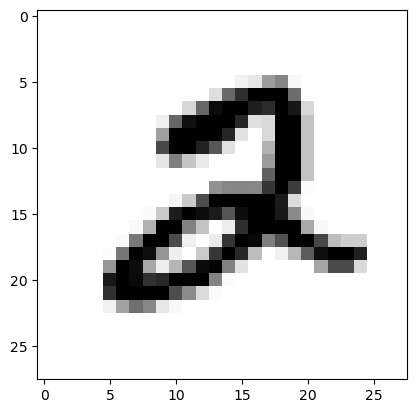

In [12]:
n = 5 # number to be iterated

plt.imshow(x[n].reshape(28,28), cmap='binary')
print(y[n])
plt.show()

## Binary classifier

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3) # separator for training and testing

In [14]:
y_train_5 = (y_train == 5)
print(y_train_5)
pd.Series(y_train_5).value_counts()

[ True  True False ... False False False]


False    44555
True      4445
dtype: int64

In [15]:
sgd_clf = SGDClassifier() # model training
sgd_clf.fit(x_train, y_train_5)

SGDClassifier()

### Model check

In [ ]:
n = 2
plt.imshow(x_train[n].reshape(28,28))

print("Classe real: ", y_train_5[n])
print("Classe predita pelo modelo: ", sgd_clf.predict([x_train[n]]))

In [16]:
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring="accuracy") # Cross validation

array([0.95812416, 0.95475418, 0.96210127])

### Confusion matrix - best method to evaluate a model

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

confusion_matrix(y_train_5, sgd_clf.predict(x_train))

array([[44323,   232],
       [ 1178,  3267]], dtype=int64)

In [19]:
y_train_pred = sgd_clf.predict(x_train)

print("Precision: ", precision_score(y_train_5, y_train_pred))
print("Recall: ", recall_score(y_train_5, y_train_pred))

Precision:  0.9336953415261503
Recall:  0.7349831271091114


In [22]:
print(confusion_matrix(y_train_5, sgd_clf.predict(x_train)))
print()
print(classification_report(y_train_5, y_train_pred))

[[44323   232]
 [ 1178  3267]]

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     44555
        True       0.93      0.73      0.82      4445

    accuracy                           0.97     49000
   macro avg       0.95      0.86      0.90     49000
weighted avg       0.97      0.97      0.97     49000



## Multiclass classification

In [23]:
sgd_clf.fit(x_train, y_train) # training for all classes

SGDClassifier()

array([5.])

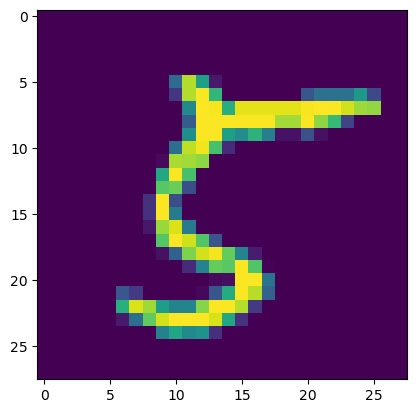

In [27]:
n = 1

digit = x_train[n]
plt.imshow(digit.reshape(28,28))
sgd_clf.predict([digit])

In [28]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
print(conf_mx)
print(classification_report(y_train, y_train_pred))

### Heatmap view

<Axes: >

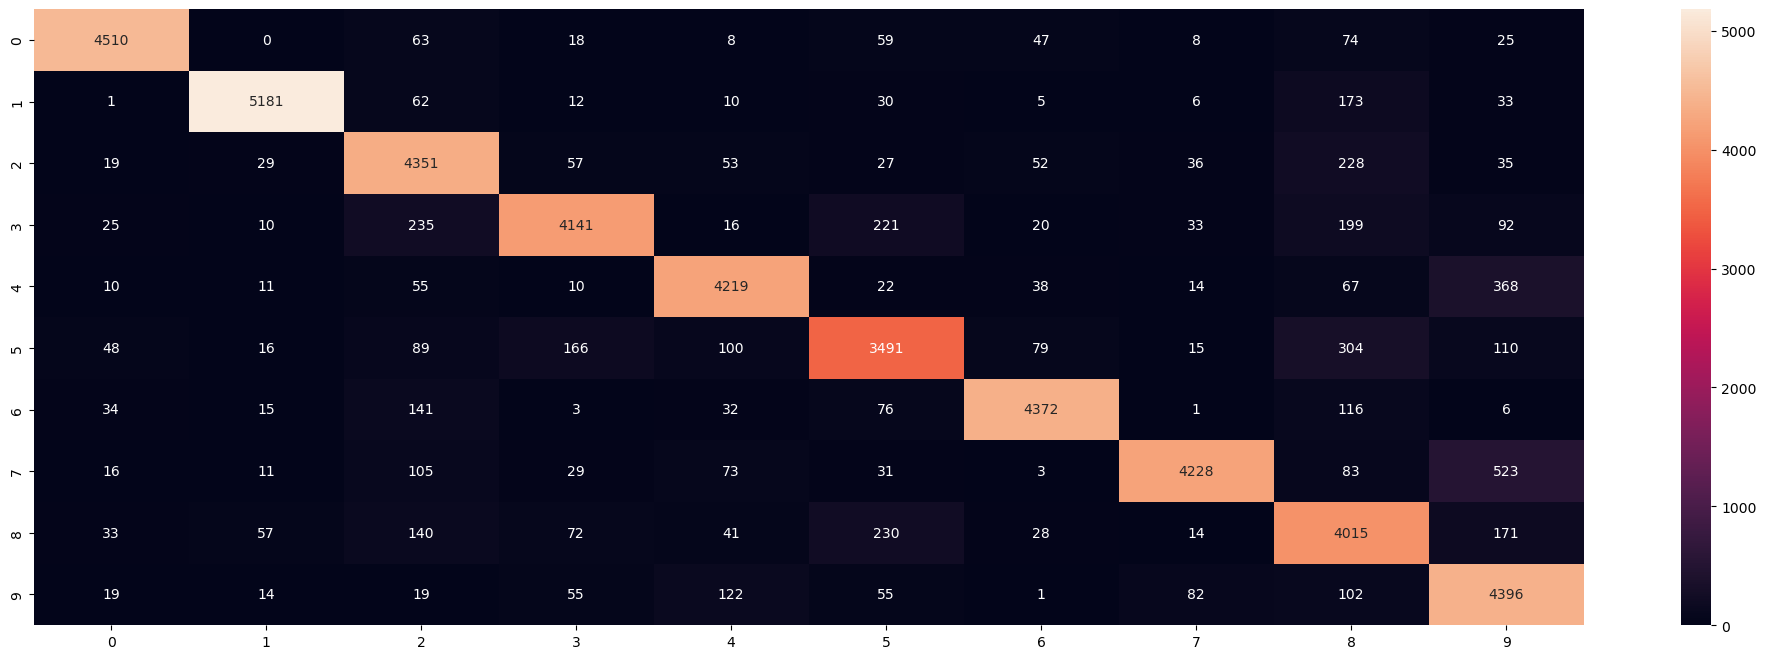

In [37]:
fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(conf_mx, annot=True, fmt=".0f")

### Proportional visualization, eliminating the main diagonal

<Axes: >

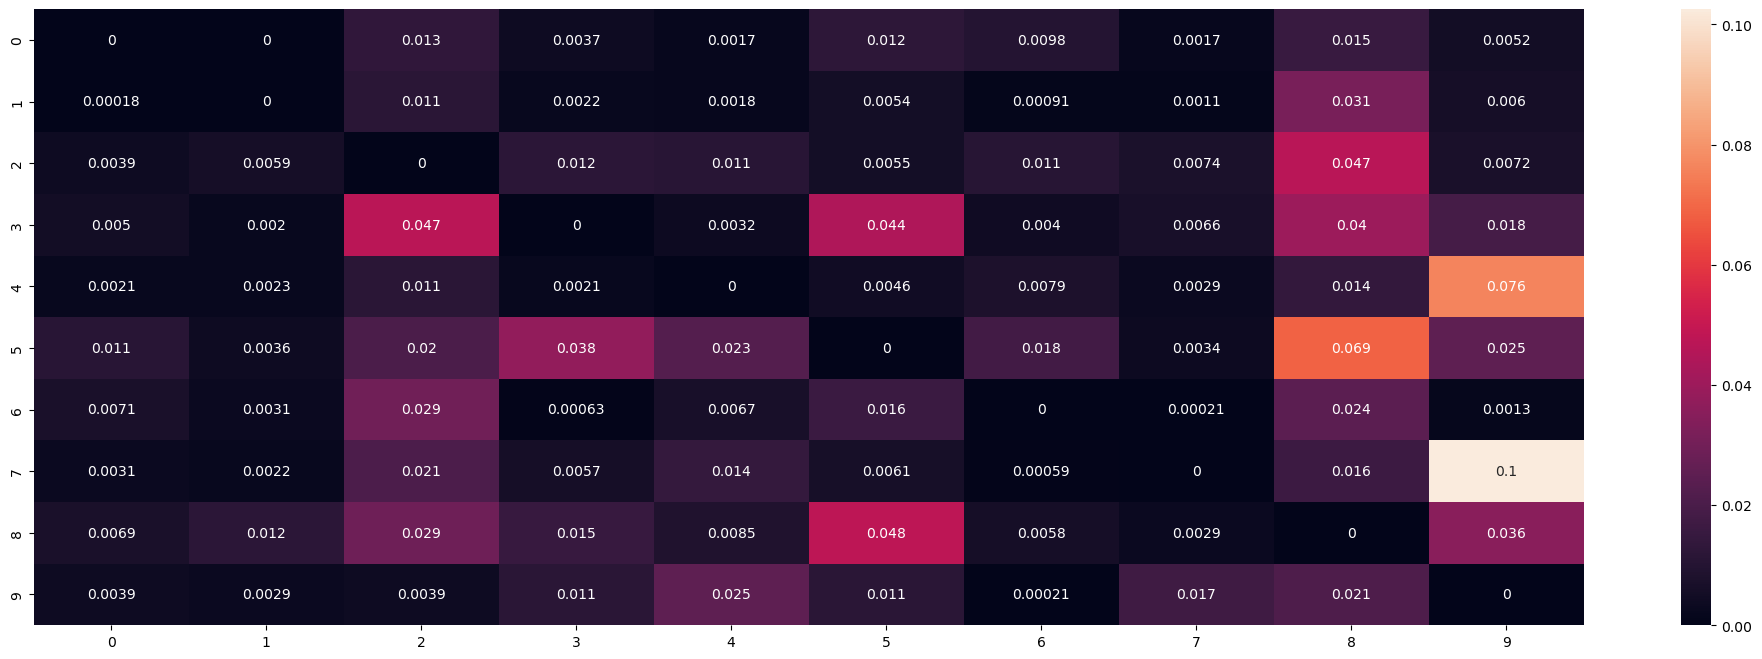

In [39]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sums

np.fill_diagonal(norm_conf_mx, 0)

fig, ax = plt.subplots(figsize=(25,8))
sns.heatmap(norm_conf_mx, ax=ax, annot=True)

## Multilabel outputs


### Conditioning the model analysis

In [41]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7) # true for numbers greater than or equal to 7
y_train_odd = (y_train %2 == 1) # true for odd numbers
y_multilabel = np.c_[y_train_large, y_train_odd]

In [42]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)

KNeighborsClassifier()

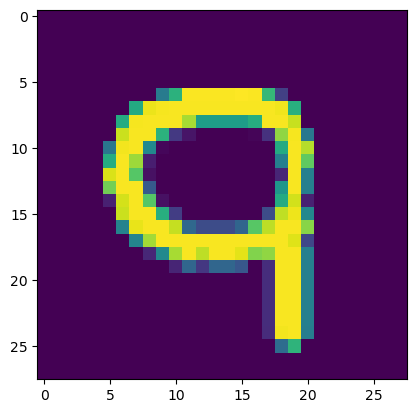

In [55]:
n = 7

digit = x_train[n]
plt.imshow(digit.reshape(28,28))
knn_clf.predict([digit])